In [1]:
import yfinance as yf
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import pandas as pd
import numpy as np
import talib
from sklearn.linear_model import LinearRegression
from datetime import datetime, timedelta

In [2]:
ticker = '002603.SZ'
data = pd.read_csv('data.csv')
data['Date'] = pd.to_datetime(data['Date'])
stock_data= data

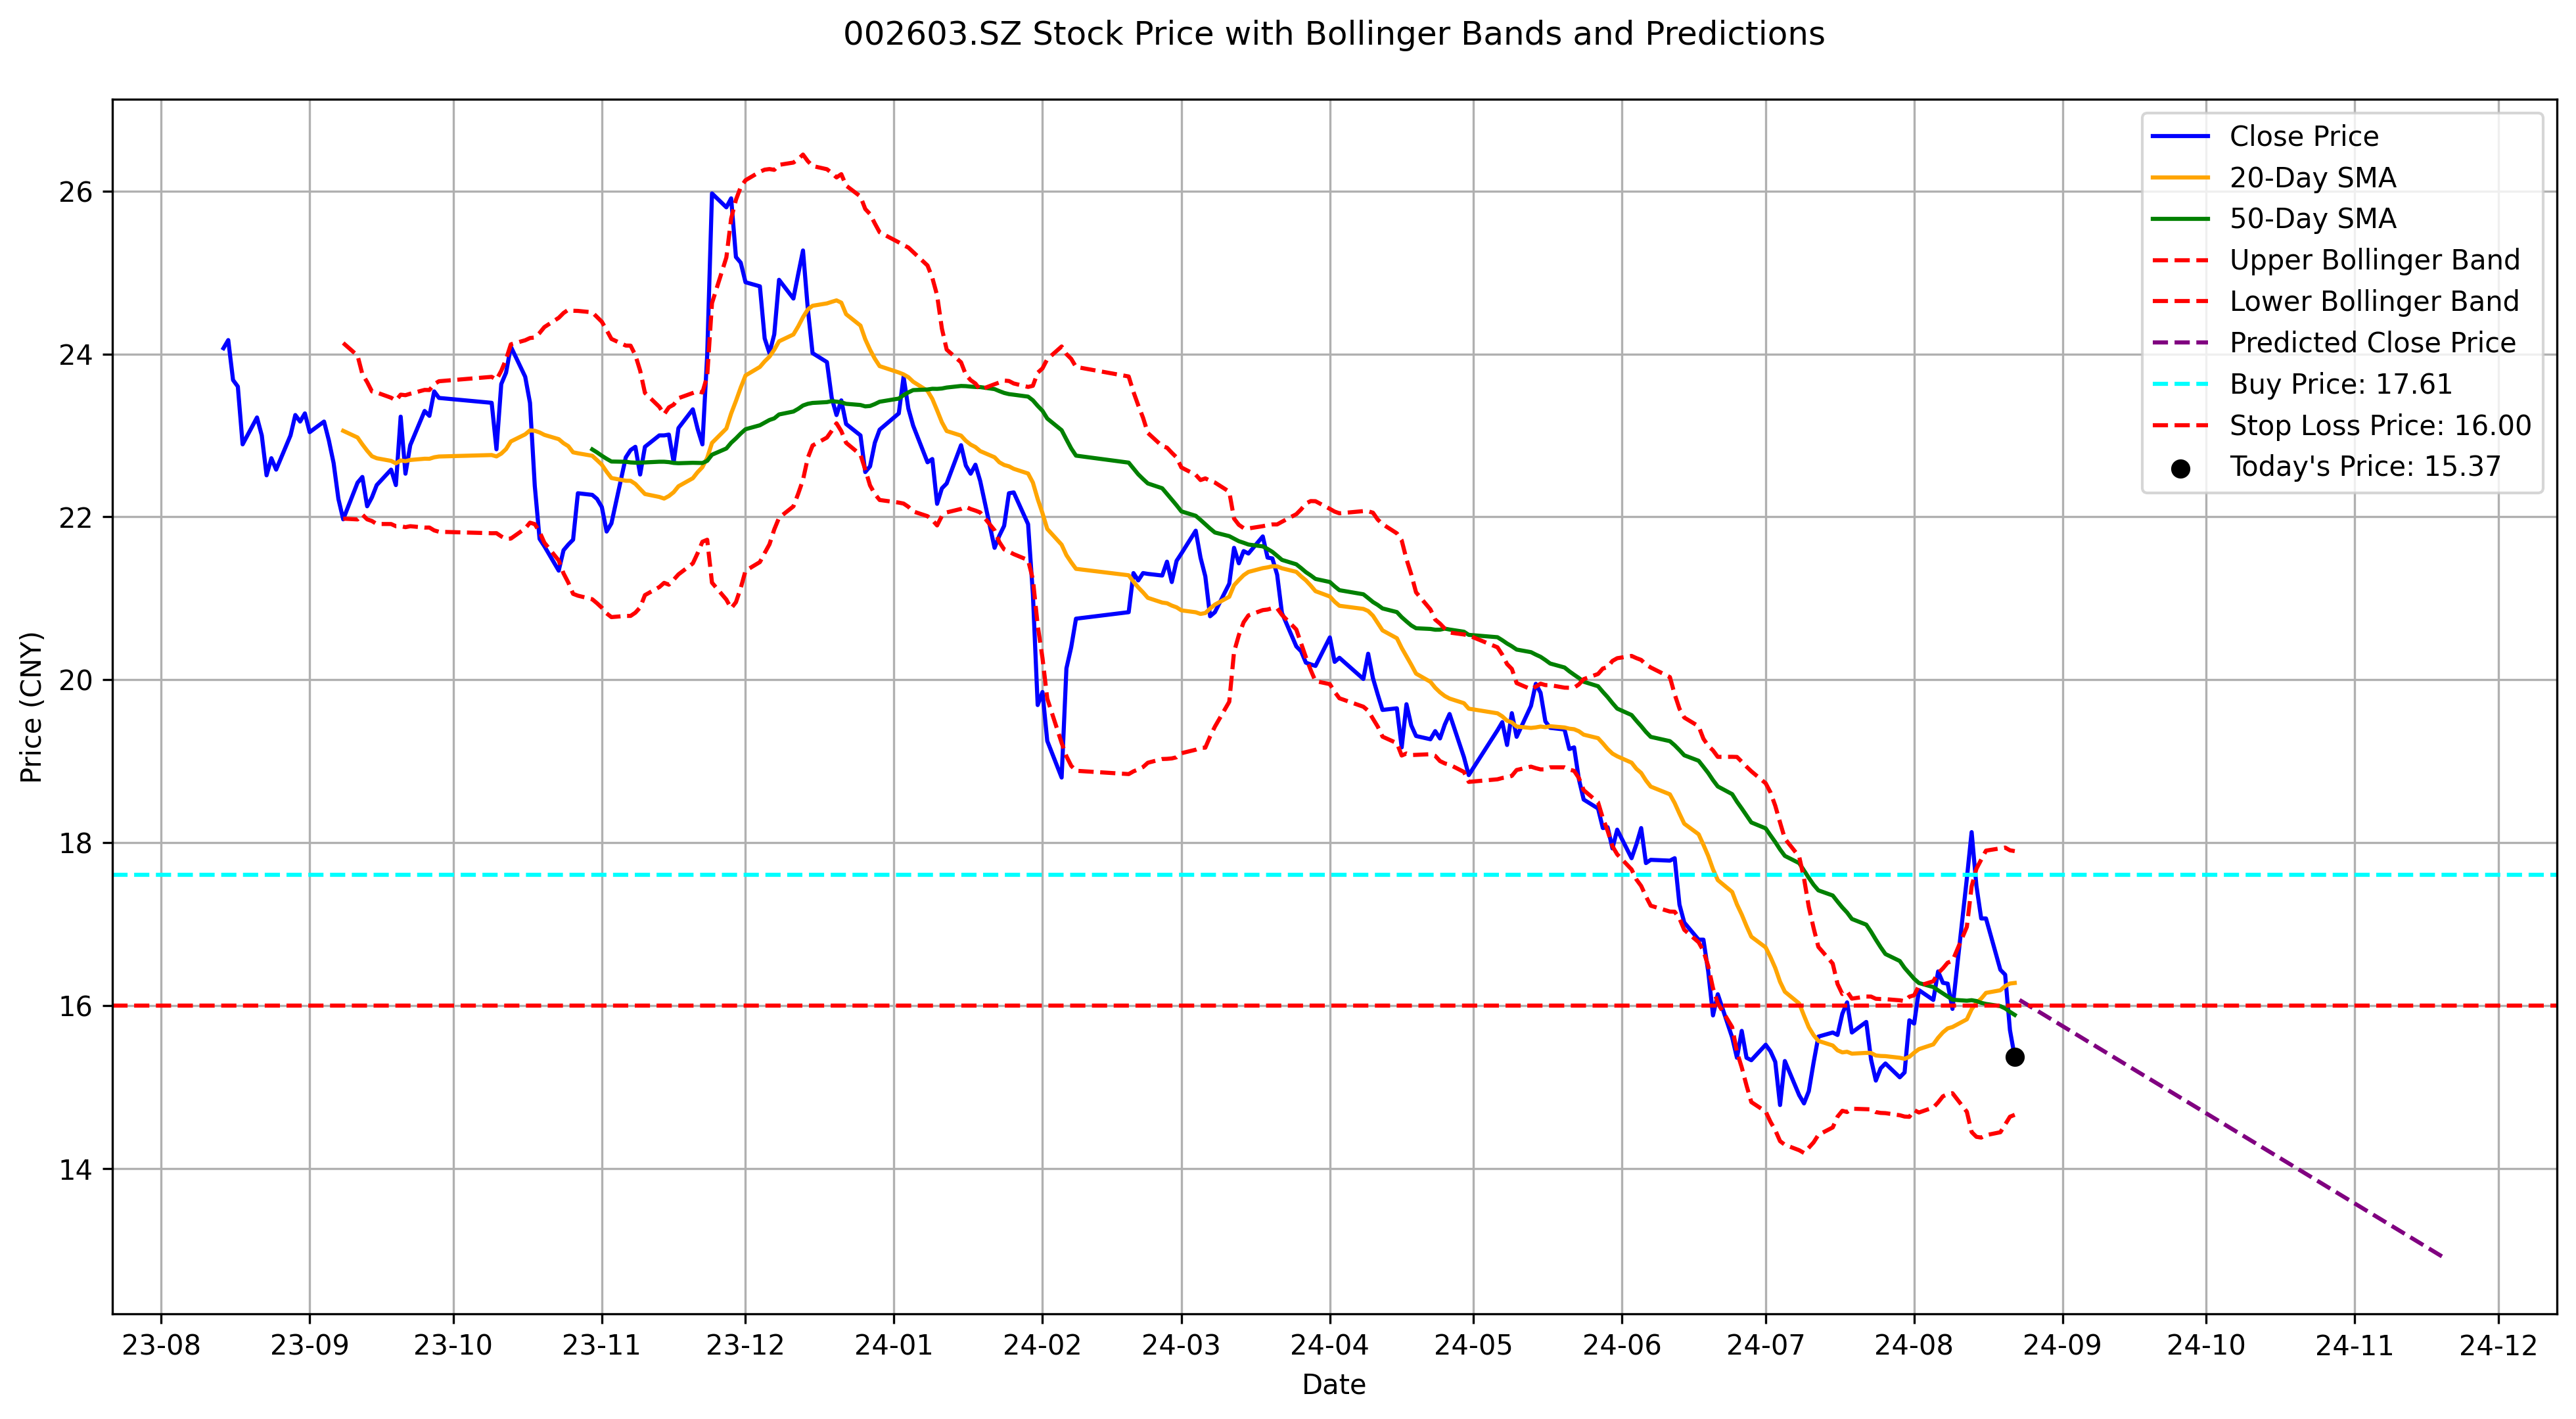

In [3]:
# Step 2: Calculate short-term (20 days) and long-term (50 days) sliding averages and Bollinger Bands
stock_data['SMA20'] = talib.SMA(stock_data['Close'], timeperiod=20)
stock_data['SMA50'] = talib.SMA(stock_data['Close'], timeperiod=50)
stock_data['UpperBand'], stock_data['MiddleBand'], stock_data['LowerBand'] = talib.BBANDS(stock_data['Close'],
                                                                                          timeperiod=20)
# Step 3: Predict the trend data for the next 3 months
X = np.array(range(len(stock_data))).reshape(-1, 1)
y = stock_data['Close'].values

# Linear Regression for trend prediction
model = LinearRegression()
model.fit(X, y)
future_days = 90  # Predict for 3 months (approx. 90 days)
future_X = np.array(range(len(stock_data) + future_days)).reshape(-1, 1)
predicted_y = model.predict(future_X)

# Step 4: Plotting the data with Bollinger Bands and teacup handle prediction
plt.figure(figsize=(16, 8), dpi=300)

# Plot historical data
plt.plot(stock_data['Date'], stock_data['Close'], label='Close Price', color='blue')
plt.plot(stock_data['Date'], stock_data['SMA20'], label='20-Day SMA', color='orange')
plt.plot(stock_data['Date'], stock_data['SMA50'], label='50-Day SMA', color='green')
plt.plot(stock_data['Date'], stock_data['UpperBand'], label='Upper Bollinger Band', color='red', linestyle='--')
plt.plot(stock_data['Date'], stock_data['LowerBand'], label='Lower Bollinger Band', color='red', linestyle='--')

# Plot predicted data
future_dates = pd.date_range(stock_data['Date'].iloc[-1], periods=future_days + 1, inclusive='right')
plt.plot(future_dates, predicted_y[-future_days:], label='Predicted Close Price', color='purple', linestyle='--')

# Step 5: Add reference lines
buy_price = 17.61
stop_loss_price = 16.0  # Stop loss at 20% below buying price

plt.axhline(y=buy_price, color='cyan', linestyle='--', label=f'Buy Price: {buy_price:.2f}')
plt.axhline(y=stop_loss_price, color='red', linestyle='--', label=f'Stop Loss Price: {stop_loss_price:.2f}')

# Step 6: Mark today's price with a circle
plt.scatter(stock_data['Date'].iloc[-1], stock_data['Close'].iloc[-1], color='black', 
            label=f"Today's Price: {stock_data['Close'].iloc[-1]}", zorder=5)

# Formatting the plot
plt.title(f'{ticker} Stock Price with Bollinger Bands and Predictions', pad=20)
plt.xlabel('Date')
plt.ylabel('Price (CNY)')
plt.legend(loc='best')
plt.grid(True)
# plt.xticks(rotation=45)
# Set x-axis major locator to month
plt.gca().xaxis.set_major_locator(mdates.MonthLocator())
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%y-%m'))

# Show the plot
plt.show()

In [4]:
today_price = stock_data['Close'].iloc[-1]
profit = (today_price-buy_price)/buy_price * 100
result = buy_price * 100 * 2 * (profit/100)
print(f'Profit: {profit:.2f}%')
print(f'Result: {result:.2f}')

Profit: -12.72%
Result: -448.00


In [5]:
today_price


15.37